In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('nrelplot')

plt.rc('font', family='serif')
plt.rc('font', size=12)
# plt.rc('facecolor', color='w')

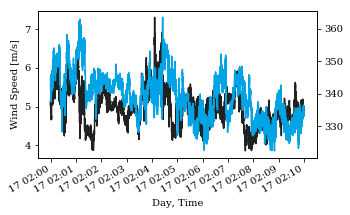

In [12]:
# # quantities of interest
# # cup-equivalent horizontal wind speed 
# cupspeed = sonicdat['Sonic_CupEqHorizSpeed_100m']
# # turbulence estimate over period, standard deviation of cupspeed
# sigma_data = np.std(cupspeed)
# # wind direction from sonic data channels
# winddir = sonicdat['Sonic_direction_100m']
# winddir[winddir<10] = winddir[winddir<10]+360

# # demo
# fig,ax = plt.subplots(figsize=(5,3))
# ax.plot(sonicdat.index,cupspeed)
# ax.set_ylabel('Wind Speed [m/s]')
# ax.set_xlabel('Day, Time')

# ax2 = plt.twinx()
# ax2.plot(sonicdat.index, winddir, color='C1')
# fig.autofmt_xdate()


# IEC standards
The NWTC is classified as type IA - special
Accordingly, there are given reference values used in the identification and quanitfication of the exteme events summarized above.

In [7]:
# Based on class IA
Vref = 50 #m/s
Iref = 0.16 # turbulence intensity
T =10
# Other parameters
# 'average' velocity
Vave = 0.2*Vref 
# shear exponent
alpha = 0.2
# longitudinal turbulence scale parameter
Lambda_1 = 42 # m
# NREL 5MW rotor diameter
D = 80

freq = 20 # Hz
t = np.linspace(0,T,T*freq)
alpha = 0.2
beta = 6.4

figdir = '../../figs_20190214'
try:
    os.makedirs(figdir)
    print('made new directory')
except:
    print('nope')

made new directory


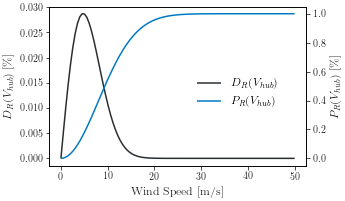

In [10]:
# Wind speed distribution
# vhub = sonicdat['Sonic_CupEqHorizSpeed_100m'].mean()
zhub=80
# prob_vhub = 1.0-np.exp(-np.pi* (vhub/(2*Vave))**2)
vrange = np.linspace(0,Vref,100)
pdf = vrange/(Vave**2)*np.exp(-np.pi*vrange**2/(np.sqrt(2)*Vave**2))
cdf = 1.0-np.exp(-np.pi* (vrange/(2*Vave))**2)

fig,ax = plt.subplots(figsize=(5,3))
ax.plot(vrange,pdf)
ax.set_xlabel(r'Wind Speed [m/s]')
ax.set_ylabel(r'$D_R(V_{hub})$ [\%]')

ax2 = ax.twinx()
ax2.plot(vrange,cdf, color='C1')
ax2.set_ylabel(r'$P_R(V_{hub})$ [\%]')


fig.legend([r'$D_R(V_{hub})$',r'$P_R(V_{hub})$'], loc=7, bbox_to_anchor=(0.8,0.5), frameon=False)
fig.tight_layout()
fig.savefig(os.path.join(figdir, 'pdfcdf.pdf'), dpi=200, bbox_inches='tight')

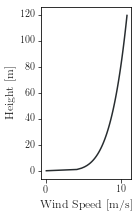

In [11]:
# normal wind profile model
z = np.linspace(0,120,120)
V = Vave*(z/zhub)**alpha

fig,ax = plt.subplots(figsize=(1.5,3))
ax.plot(V,z)
ax.set_xlabel('Wind Speed [m/s]')
ax.set_ylabel('Height [m]')
fig.savefig(os.path.join(figdir, 'IECprofile.pdf'), dpi=200, bbox_inches='tight')

/Users/nhamilto/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


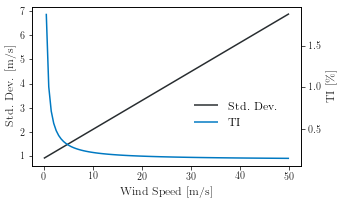

In [13]:
# normal turbulence model
sigma_1 = Iref*(0.75*Vave + 5.6)
sigma_range = Iref*(0.75*vrange + 5.6)

fig,ax = plt.subplots(figsize=(5,3))
ax.plot(vrange,sigma_range)
ax.set_xlabel('Wind Speed [m/s]')
ax.set_ylabel('Std. Dev. [m/s]')
# ax.set_title('Turb std.dev. for NTM')

ti_range = sigma_range/vrange
ax2 = ax.twinx()
ax2.plot(vrange,ti_range, color='C1')
# ax.set_xlabel('Wind Speed [m/s]')
ax2.set_ylabel('TI [\%]')
# ax.set_title('TI for NTM')

fig.legend(['Std. Dev.','TI'], loc=7, bbox_to_anchor=(0.8,0.4), frameon=False)
fig.tight_layout()
fig.savefig(os.path.join(figdir, 'stdTI.pdf'), dpi=200, bbox_inches='tight')


# Extreme conditions

In [21]:
temp = 1.4*params['Vref']*(params['z']/params['zhub'])**(0.11)
len(temp)

120

In [18]:
# Extreme wind speed model (EWM)
Ve50 = 1.4*Vref*(z/zhub)**(0.11)
Ve01 = 0.8*Ve50

# Compare extreme wind speeds to data
# if an extreme event occurs, append filename to list
Ve50test = cupspeed[cupspeed > Ve50[probeheight]]
if len(Ve50test) > 0:
    print('yes')
Ve01test = cupspeed[cupspeed > Ve01[probeheight]]
if len(Ve01test) > 0:
    print('yes')


Text(0.5,1,'Example EOG')

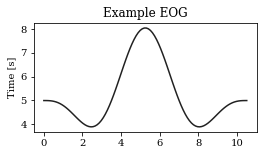

In [47]:
# Extreme operating gust (EOG)
Vgust = np.min([1.35*(Ve01[zhub]-vhub), 3.3*(sigma_1/(1+0.1*D/Lambda_1))])
t = np.linspace(0,10.5,100)
Vgust = vhub-0.37*Vgust*np.sin(3*np.pi*t/10.5)*(1-np.cos(2*np.pi*t/10.5))

# Compare maximum gust speed to data
# if an extreme event occurs, append filename to list
Vgusttest = cupspeed[cupspeed > Vgust.max()]
if len(Ve50test) > 0:
    print('yes')

for itime, tempdir in cupspeed.iloc[::20].items():
    starttime = itime
    endtime = starttime + datetime.timedelta(seconds=delay) # starttime + 6 seconds
    # extract 6 second slice of direction data
    tslice = cupspeed.loc[starttime:endtime]
    # test 
    Vgusttest = tslice[tslice > Vgust.max()]
    
    if len(Ve50test) > 0:
        print('yes')
        
fig,ax = plt.subplots(figsize=(4,2))
ax.plot(t,Vgust)
ax.set_ylabel('Gust Speed [m/s]')
ax.set_ylabel('Time [s]')
ax.set_title('Example EOG')

In [43]:
# Extreme turbulence model
c = 2 # m/s
sigmatest = c*Iref*(0.072*(Vave/c+3)*(vhub/c+4)+10)

# Compare maximum turbulence to data
# if an extreme event occurs, append filename to list
sigmatest = sigma_data > sigmatest
if sigmatest:
    print('yes')


In [46]:
# Extreme direction change (EDC)
# Maximum allowable change in wind direction over a 6 second period
theta_e = np.degrees(4*np.arctan(sigma_1/(vhub*(1+0.1*D/Lambda_1))))
delay = 6 # seconds * sampling freq

for itime, tempdir in winddir.iloc[::20].items():
    starttime = itime
    endtime = starttime + datetime.timedelta(seconds=delay) # starttime + 6 seconds
    # extract 6 second slice of direction data
    tslice = winddir.loc[starttime:endtime]
    # test 
    dirtest = tslice[np.abs(tslice-tempdir) > theta_e]
    
    if len(dirtest) > 0:
        print('Extreme wind direction change found in {} - {}'.format(starttime, endtime))
        print(len(dirtest))
        

In [78]:
# Extreme coherent gust with direction change (ECD)

# extreme coherent gust velocity magnitude
Vcg = 15 # m/s
# rise time
T = 10 # s 
# 10 seconds at 20 Hz
t = np.linspace(0,10,200)
freq = 20 # Hz

vzt = cupspeed[starttime] + 0.5*Vcg*(1-np.cos(np.pi*t/T))
thetat = winddir[starttime] + 0.5*Vcg*(1-np.cos(np.pi*t/T))

# scan for ECD
for itime, tempdir in cupspeed.iloc[:-T*freq:20].items():
    starttime = itime
    endtime = starttime + datetime.timedelta(seconds=T) # starttime + 10 seconds
    
    vstart = cupspeed.loc[starttime]
    vend = cupspeed.loc[endtime]
    
    # extreme  cohcerent gust velocity change
    V_ECD = vstart + Vcg
    # test
    if vend >= V_ECD:
        
        dstart = winddir.loc[starttime]
        dend = winddir.loc[endtime]
        
        # extreme  cohcerent gust direction change
        if vhub < 4:
            theta_cg = 180 # degrees
        elif vhub < Vref:
            theta_cg = 720/vhub # degrees
        # test
        if np.abs(dend-dstart) > theta_cg:
            print('yes')
        

In [89]:
# Extreme wind shear (EWS)

# extreme coherent gust velocity magnitude
Vcg = 15 # m/s
# rise time
T = 12 # s 
# 12 seconds at 20 Hz
freq = 20 # Hz
t = np.linspace(0,T,T*freq)
alpha = 0.2
beta = 6.4


# transient vertical shear
v_vert_pos = vhub*(probeheight/zhub)**alpha + ((probeheight-zhub)/D)*(2.5 + 0.2*beta*sigma_1*(D/Lambda_1)**0.25)*(1-np.cos(np.pi*T/T))
v_vert_neg = vhub*(probeheight/zhub)**alpha - ((probeheight-zhub)/D)*(2.5 + 0.2*beta*sigma_1*(D/Lambda_1)**0.25)*(1-np.cos(np.pi*T/T))

# # transient horizontal shear
# v_horz_pos = vhub*(probeheight/zhub)**alpha + ((probeheight-zhub)/D)*(2.5 + 0.2*beta*sigma_1*(D/Lambda_1)**0.25)*(1-np.cos(np.pi*T/T))

# scan for ECD
for itime, tempdir in cupspeed.iloc[:-T*freq:20].items():
    starttime = itime
    endtime = starttime + datetime.timedelta(seconds=T) # starttime + 10 seconds
    
    vslice = cupspeed.loc[starttime:endtime]
    
    # transient vertical shear
    v_vert_pos = vhub*(probeheight/zhub)**alpha + ((probeheight-zhub)/D)*(2.5 + 0.2*beta*sigma_1*(D/Lambda_1)**0.25)*(1-np.cos(np.pi*T/T))
    v_vert_neg = vhub*(probeheight/zhub)**alpha - ((probeheight-zhub)/D)*(2.5 + 0.2*beta*sigma_1*(D/Lambda_1)**0.25)*(1-np.cos(np.pi*T/T))
    
    # test
    vtest = vslice[(vslice > v_vert_pos) | (vslice < v_vert_neg)]
    
    if len(vtest) > 0:
        print('yes')

In [ ]:
x

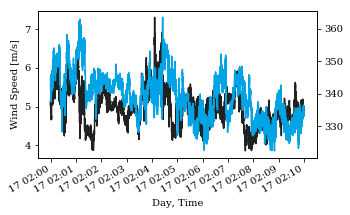

In [12]:
# quantities of interest
# cup-equivalent horizontal wind speed 
cupspeed = sonicdat['Sonic_CupEqHorizSpeed_100m']
# turbulence estimate over period, standard deviation of cupspeed
sigma_data = np.std(cupspeed)
# wind direction from sonic data channels
winddir = sonicdat['Sonic_direction_100m']
winddir[winddir<10] = winddir[winddir<10]+360

# demo
fig,ax = plt.subplots(figsize=(5,3))
ax.plot(sonicdat.index,cupspeed)
ax.set_ylabel('Wind Speed [m/s]')
ax.set_xlabel('Day, Time')

ax2 = plt.twinx()
ax2.plot(sonicdat.index, winddir, color='C1')
fig.autofmt_xdate()


# IEC standards
The NWTC is classified as type IA - special
Accordingly, there are given reference values used in the identification and quanitfication of the exteme events summarized above.

In [14]:
# Based on class IA
Vref = 50 #m/s
Iref = 0.16 # turbulence intensity
T =10
# Other parameters
# 'average' velocity
Vave = 0.2*Vref 
# shear exponent
alpha = 0.2
# longitudinal turbulence scale parameter
Lambda_1 = 42 # m
# NREL 5MW rotor diameter
D = 80

freq = 20 # Hz
t = np.linspace(0,T,T*freq)
alpha = 0.2
beta = 6.4


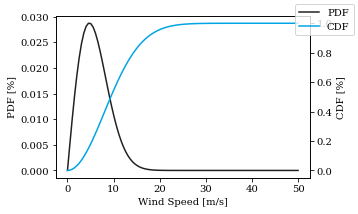

In [15]:
# Wind speed distribution
vhub = sonicdat['Sonic_CupEqHorizSpeed_100m'].mean()
zhub=80
prob_vhub = 1.0-np.exp(-np.pi* (vhub/(2*Vave))**2)
vrange = np.linspace(0,Vref,100)
pdf = vrange/(Vave**2)*np.exp(-np.pi*vrange**2/(np.sqrt(2)*Vave**2))
cdf = 1.0-np.exp(-np.pi* (vrange/(2*Vave))**2)

fig,ax = plt.subplots(figsize=(5,3))
ax.plot(vrange,pdf)
ax.set_xlabel('Wind Speed [m/s]')
ax.set_ylabel('PDF [%]')

ax2 = ax.twinx()
ax2.plot(vrange,cdf, color='C1')
ax2.set_ylabel('CDF [%]')


fig.legend(['PDF','CDF'])
fig.tight_layout()

Text(0,0.5,'Height [m]')

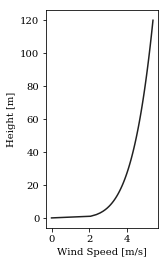

In [16]:
# normal wind profile model
z = np.linspace(0,120,120)
V = vhub*(z/zhub)**alpha

fig,ax = plt.subplots(figsize=(2,4))
ax.plot(V,z)
ax.set_xlabel('Wind Speed [m/s]')
ax.set_ylabel('Height [m]')

/Users/nhamilto/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


Text(0.5,1,'TI for NTM')

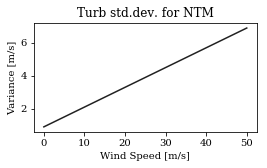

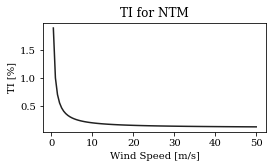

In [17]:
# normal turbulence model
sigma_1 = Iref*(0.75*vhub + 5.6)
sigma_range = Iref*(0.75*vrange + 5.6)

fig,ax = plt.subplots(figsize=(4,2))
ax.plot(vrange,sigma_range)
ax.set_xlabel('Wind Speed [m/s]')
ax.set_ylabel('Variance [m/s]')
ax.set_title('Turb std.dev. for NTM')

ti_range = sigma_range/vrange
fig,ax = plt.subplots(figsize=(4,2))
ax.plot(vrange,ti_range)
ax.set_xlabel('Wind Speed [m/s]')
ax.set_ylabel('TI [%]')
ax.set_title('TI for NTM')


# Extreme conditions

In [21]:
temp = 1.4*params['Vref']*(params['z']/params['zhub'])**(0.11)
len(temp)

120

In [18]:
# Extreme wind speed model (EWM)
Ve50 = 1.4*Vref*(z/zhub)**(0.11)
Ve01 = 0.8*Ve50

# Compare extreme wind speeds to data
# if an extreme event occurs, append filename to list
Ve50test = cupspeed[cupspeed > Ve50[probeheight]]
if len(Ve50test) > 0:
    print('yes')
Ve01test = cupspeed[cupspeed > Ve01[probeheight]]
if len(Ve01test) > 0:
    print('yes')


Text(0.5,1,'Example EOG')

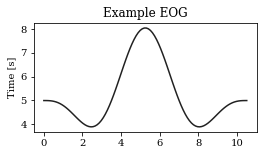

In [47]:
# Extreme operating gust (EOG)
Vgust = np.min([1.35*(Ve01[zhub]-vhub), 3.3*(sigma_1/(1+0.1*D/Lambda_1))])
t = np.linspace(0,10.5,100)
Vgust = vhub-0.37*Vgust*np.sin(3*np.pi*t/10.5)*(1-np.cos(2*np.pi*t/10.5))

# Compare maximum gust speed to data
# if an extreme event occurs, append filename to list
Vgusttest = cupspeed[cupspeed > Vgust.max()]
if len(Ve50test) > 0:
    print('yes')

for itime, tempdir in cupspeed.iloc[::20].items():
    starttime = itime
    endtime = starttime + datetime.timedelta(seconds=delay) # starttime + 6 seconds
    # extract 6 second slice of direction data
    tslice = cupspeed.loc[starttime:endtime]
    # test 
    Vgusttest = tslice[tslice > Vgust.max()]
    
    if len(Ve50test) > 0:
        print('yes')
        
fig,ax = plt.subplots(figsize=(4,2))
ax.plot(t,Vgust)
ax.set_ylabel('Gust Speed [m/s]')
ax.set_ylabel('Time [s]')
ax.set_title('Example EOG')

In [43]:
# Extreme turbulence model
c = 2 # m/s
sigmatest = c*Iref*(0.072*(Vave/c+3)*(vhub/c+4)+10)

# Compare maximum turbulence to data
# if an extreme event occurs, append filename to list
sigmatest = sigma_data > sigmatest
if sigmatest:
    print('yes')


In [46]:
# Extreme direction change (EDC)
# Maximum allowable change in wind direction over a 6 second period
theta_e = np.degrees(4*np.arctan(sigma_1/(vhub*(1+0.1*D/Lambda_1))))
delay = 6 # seconds * sampling freq

for itime, tempdir in winddir.iloc[::20].items():
    starttime = itime
    endtime = starttime + datetime.timedelta(seconds=delay) # starttime + 6 seconds
    # extract 6 second slice of direction data
    tslice = winddir.loc[starttime:endtime]
    # test 
    dirtest = tslice[np.abs(tslice-tempdir) > theta_e]
    
    if len(dirtest) > 0:
        print('Extreme wind direction change found in {} - {}'.format(starttime, endtime))
        print(len(dirtest))
        

In [78]:
# Extreme coherent gust with direction change (ECD)

# extreme coherent gust velocity magnitude
Vcg = 15 # m/s
# rise time
T = 10 # s 
# 10 seconds at 20 Hz
t = np.linspace(0,10,200)
freq = 20 # Hz

vzt = cupspeed[starttime] + 0.5*Vcg*(1-np.cos(np.pi*t/T))
thetat = winddir[starttime] + 0.5*Vcg*(1-np.cos(np.pi*t/T))

# scan for ECD
for itime, tempdir in cupspeed.iloc[:-T*freq:20].items():
    starttime = itime
    endtime = starttime + datetime.timedelta(seconds=T) # starttime + 10 seconds
    
    vstart = cupspeed.loc[starttime]
    vend = cupspeed.loc[endtime]
    
    # extreme  cohcerent gust velocity change
    V_ECD = vstart + Vcg
    # test
    if vend >= V_ECD:
        
        dstart = winddir.loc[starttime]
        dend = winddir.loc[endtime]
        
        # extreme  cohcerent gust direction change
        if vhub < 4:
            theta_cg = 180 # degrees
        elif vhub < Vref:
            theta_cg = 720/vhub # degrees
        # test
        if np.abs(dend-dstart) > theta_cg:
            print('yes')
        

In [89]:
# Extreme wind shear (EWS)

# extreme coherent gust velocity magnitude
Vcg = 15 # m/s
# rise time
T = 12 # s 
# 12 seconds at 20 Hz
freq = 20 # Hz
t = np.linspace(0,T,T*freq)
alpha = 0.2
beta = 6.4


# transient vertical shear
v_vert_pos = vhub*(probeheight/zhub)**alpha + ((probeheight-zhub)/D)*(2.5 + 0.2*beta*sigma_1*(D/Lambda_1)**0.25)*(1-np.cos(np.pi*T/T))
v_vert_neg = vhub*(probeheight/zhub)**alpha - ((probeheight-zhub)/D)*(2.5 + 0.2*beta*sigma_1*(D/Lambda_1)**0.25)*(1-np.cos(np.pi*T/T))

# # transient horizontal shear
# v_horz_pos = vhub*(probeheight/zhub)**alpha + ((probeheight-zhub)/D)*(2.5 + 0.2*beta*sigma_1*(D/Lambda_1)**0.25)*(1-np.cos(np.pi*T/T))

# scan for ECD
for itime, tempdir in cupspeed.iloc[:-T*freq:20].items():
    starttime = itime
    endtime = starttime + datetime.timedelta(seconds=T) # starttime + 10 seconds
    
    vslice = cupspeed.loc[starttime:endtime]
    
    # transient vertical shear
    v_vert_pos = vhub*(probeheight/zhub)**alpha + ((probeheight-zhub)/D)*(2.5 + 0.2*beta*sigma_1*(D/Lambda_1)**0.25)*(1-np.cos(np.pi*T/T))
    v_vert_neg = vhub*(probeheight/zhub)**alpha - ((probeheight-zhub)/D)*(2.5 + 0.2*beta*sigma_1*(D/Lambda_1)**0.25)*(1-np.cos(np.pi*T/T))
    
    # test
    vtest = vslice[(vslice > v_vert_pos) | (vslice < v_vert_neg)]
    
    if len(vtest) > 0:
        print('yes')

In [ ]:
x